In [132]:
# Cargamos las librerías necesarias,

In [133]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [134]:
# Cargamos el dataset

In [135]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [136]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [137]:
# Cogemos la variable Age Category y la convertimos a variables numérica haciendo media de los números de cada categoría

In [138]:


encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')



In [139]:
# Creamos gráfico violín de edad

<AxesSubplot:xlabel='HeartDisease', ylabel='AgeCategory'>

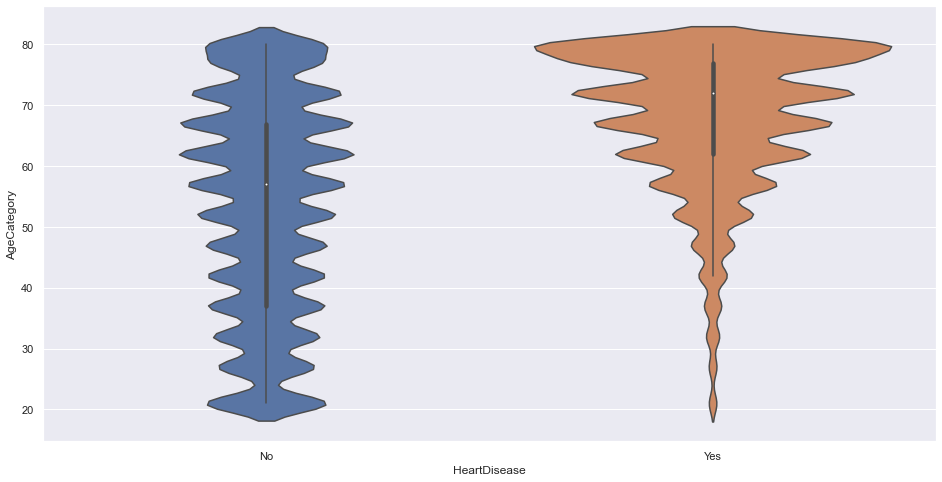

In [140]:
sns.violinplot(data=df, x="HeartDisease", y="AgeCategory")

In [ ]:
# Creamos gráfico violín de BMI y sexo

<AxesSubplot:xlabel='HeartDisease', ylabel='BMI'>

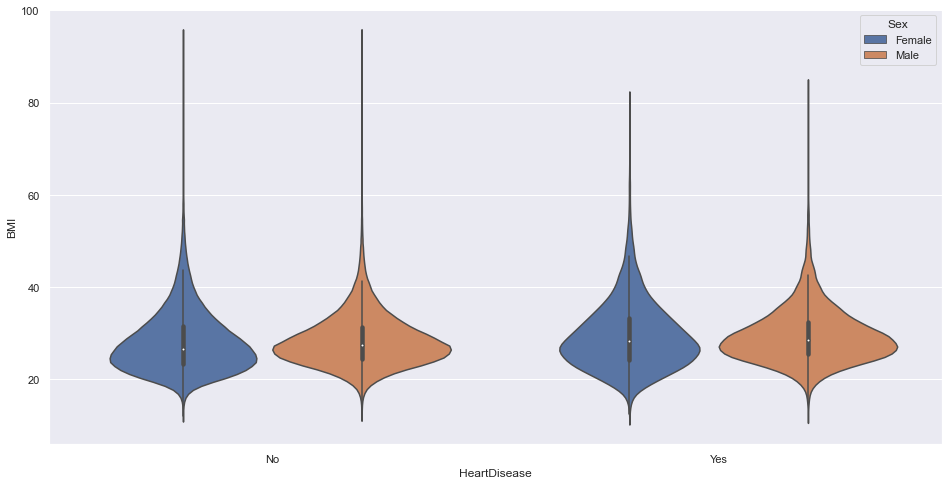

In [119]:
sns.violinplot(data=df, x="HeartDisease", y="BMI", hue="Sex")

In [ ]:
# Creamos gráfico violín de edad y raza

<AxesSubplot:xlabel='HeartDisease', ylabel='AgeCategory'>

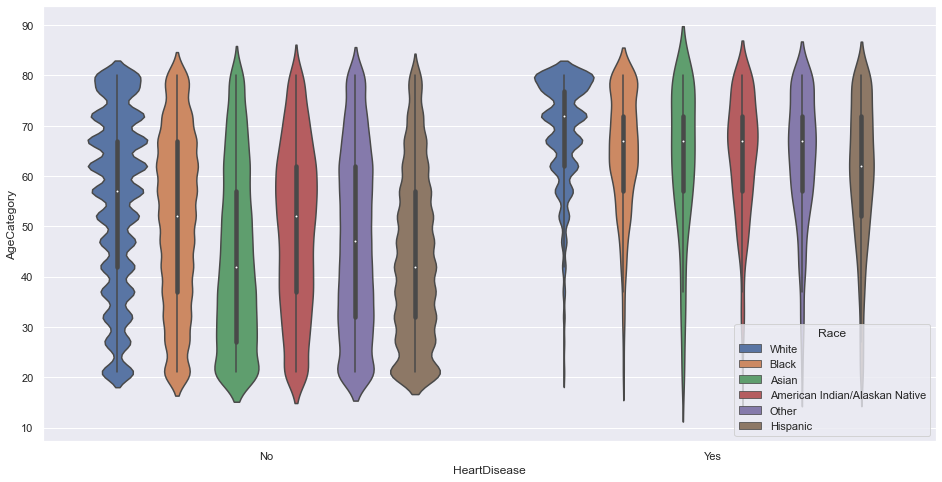

In [120]:
sns.violinplot(data=df, x="HeartDisease", y="AgeCategory", hue="Race")

In [141]:
# Creamos gráfico violín de edad y sexo

<AxesSubplot:xlabel='HeartDisease', ylabel='AgeCategory'>

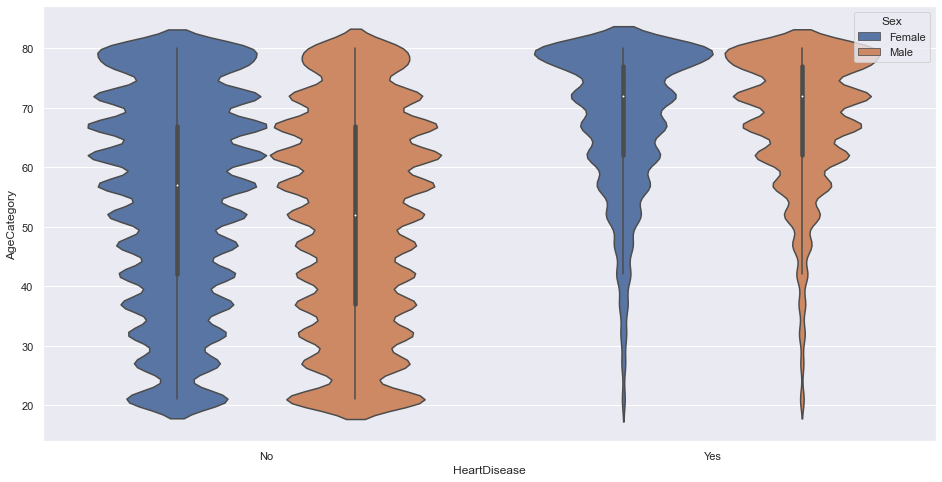

In [142]:
sns.violinplot(data=df, x="HeartDisease", y="AgeCategory", hue="Sex")

In [ ]:
# Creamos gráfico boxplot de edad y dificultades andando

<AxesSubplot:xlabel='HeartDisease', ylabel='AgeCategory'>

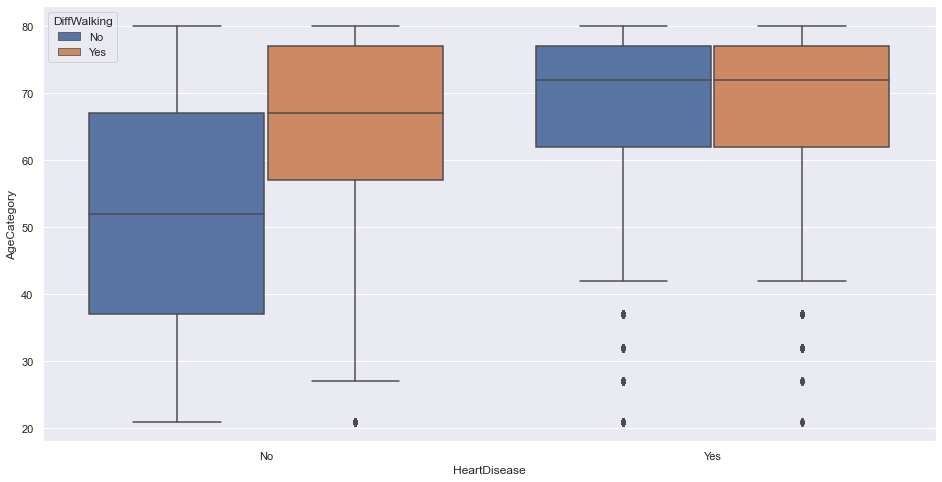

In [122]:
sns.boxplot(data=df, x="HeartDisease", y="AgeCategory", hue="DiffWalking")


In [ ]:
# Creamos gráfico de barras para ver frecuencia de casos de enfermedades del corazón haciendo actividad física vs no haciendo

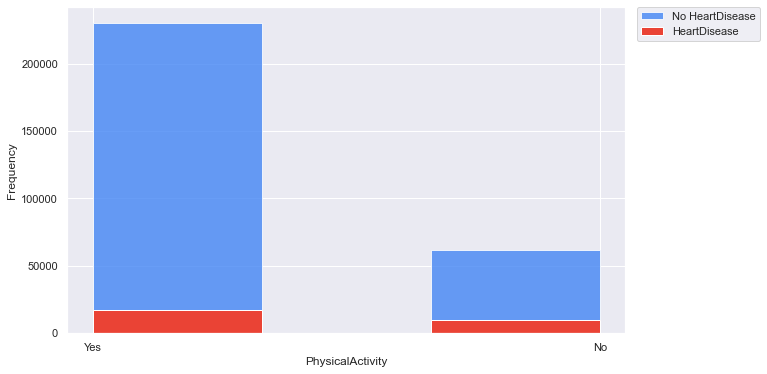

In [124]:


fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["PhysicalActivity"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["PhysicalActivity"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("PhysicalActivity")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)



In [127]:
activity_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['PhysicalActivity']=='Yes')])
num_activity = len(df[df['PhysicalActivity']=='Yes'])
no_activity_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['PhysicalActivity']=='No')])
num_no_activity = len(df[df['PhysicalActivity']=='No'])
print('Probabilidad si haces actividad fisica:', activity_and_heart_disease/num_activity *100)
print("Probabilidad si no haces actividad física:", no_activity_heart_disease/num_no_activity *100)

Probabilidad si haces actividad fisica: 7.053239069677404
Probabilidad si no haces actividad física: 13.758734931373368


In [ ]:
# Creamos gráfico de barras para ver frecuencia de casos de enfermedades del corazón bebiendo alcohol vs no bebiendo

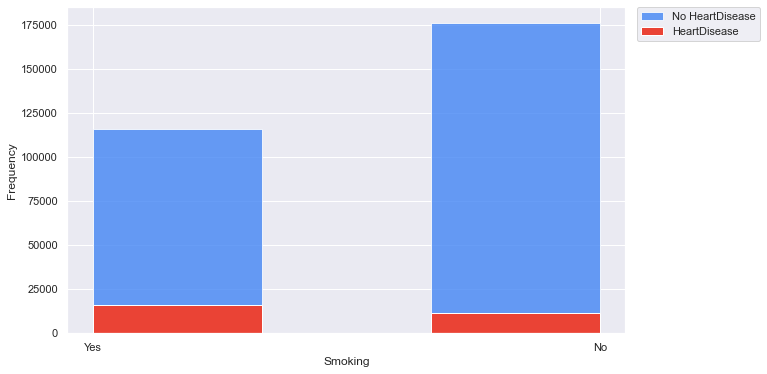

In [128]:


fig, ax = plt.subplots(figsize = (10,6))

ax.hist(df[df["HeartDisease"]=='No']["Smoking"], bins=3, alpha=0.8, color="#4285f4", label="No HeartDisease")
ax.hist(df[df["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#ea4335", label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [129]:
smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='Yes')])
num_smoke = len(df[df['Smoking']=='Yes'])
no_smoke_and_heart_disease = len(df[(df['HeartDisease']=='Yes') & (df['Smoking']=='No')])
num_no_smoke = len(df[df['Smoking']=='No'])
print('Probabilidad si bebes alcohol:', smoke_and_heart_disease/num_smoke)
print("Probabilidad si no bebes alcohol:", no_smoke_and_heart_disease/num_no_smoke)

Probabilidad si bebes alcohol: 0.12157715983867544
Probabilidad si no bebes alcohol: 0.0603341370078824


In [ ]:
# Convertimos las variables categórias en numéricas para crear matriz de correlación

In [130]:


# Integer encode columns with 2 unique values
for col in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
# One-hot encode columns with more than 2 unique values
df = pd.get_dummies(df, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])




In [131]:


fig = px.imshow(df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','BMI', 'PhysicalHealth',
                    'MentalHealth', 'AgeCategory', 'SleepTime']].corr(),color_continuous_scale="Blues")
fig.update_layout(height=800)
fig.show()

